In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
def dilantin_single(k, T, dose, dt, freq, abs_factor):
    T_arr = np.arange(0, T+dt, dt)      #Time-scale 
    Q = 0                               #Initial Concentration
    Q_arr = 0 * T_arr                   #Concentration array
    dose_time = int(freq/dt)            #Frequency index
    
    for i in range(len(T_arr)):         #Finding concentration 
        Q = Q - Q*k*dt                  #at ith time index
        if i%dose_time == 0:
            Q += abs_factor*dose
        Q_arr[i] = Q
    
    return T_arr, Q_arr

## Q1

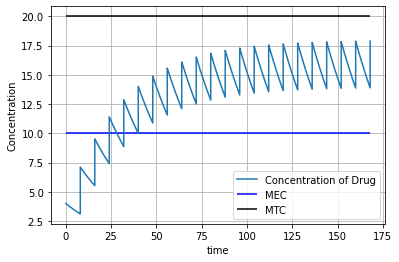

In [31]:
t_half = 22
freq = 8
T = 168
dose = 100*1000
vol = 3000
abs_factor = 0.12
MEC = 10
MTC = 20

dt = 0.001

k = math.log(2)/t_half

t_arr, q_arr = dilantin_single(k, T, dose, dt, freq, abs_factor)
plt.figure()
plt.plot(t_arr, q_arr/vol, label="Concentration of Drug")
plt.hlines(MEC, 0, 168, 'b', label='MEC')
plt.hlines(MTC, 0, 168, 'k', label='MTC')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q1.png")

## Q5

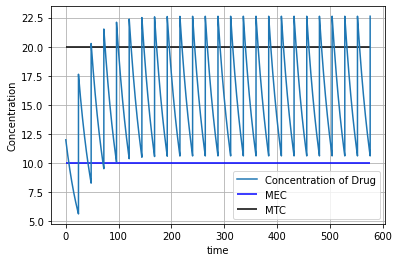

In [32]:
t_half = 22
freq = 24
T = 24 * 24
dose = 300 * 1000
vol = 3000
abs_factor = 0.12
MEC = 10
MTC = 20

dt = 0.001

k = math.log(2)/t_half

t_arr, q_arr = dilantin_single(k, T, dose, dt, freq, abs_factor)
plt.figure()
plt.plot(t_arr, q_arr/vol, label="Concentration of Drug")
plt.hlines(MEC, 0, T, 'b', label='MEC')
plt.hlines(MTC, 0, T, 'k', label='MTC')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q5.png")

## Q5- B

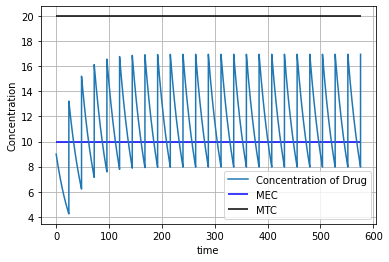

In [33]:
t_half = 22
freq = 24
T = 24 * 24
dose = 300 * 1000
vol = 3000
abs_factor = 0.09
MEC = 10
MTC = 20

dt = 0.001

k = math.log(2)/t_half

t_arr, q_arr = dilantin_single(k, T, dose, dt, freq, abs_factor)
plt.figure()
plt.plot(t_arr, q_arr/vol, label="Concentration of Drug")
plt.hlines(MEC, 0, T, 'b', label='MEC')
plt.hlines(MTC, 0, T, 'k', label='MTC')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q5b.png")

In [34]:
def two_compartment(k10, k21, k12, D1, t, dt, freq, abs_factor):
    
    T_arr = np.arange(0, t+dt, dt)
    x1 = 0.0
    x2 = 0.0
    dx1 = 0.0
    dx2 = 0.0
    x1_arr = 0 * T_arr
    x2_arr = 0 * T_arr
    freq_index = int(freq/dt)

    for i in range(len(T_arr)):

        dx1 = -(k10 + k12) * x1 + k21 * (x2)
        dx2 = k12 * x1 - k21 * x2
        x1 += dx1 * dt
        x2 += dx2 * dt
        if i % freq_index == 0:
            #print(T_arr[i])
            x1 += abs_factor * D1
        x1_arr[i] = x1
        x2_arr[i] = x2

    return T_arr, x1_arr, x2_arr


## Project Q1
### Single dose for two compartment model

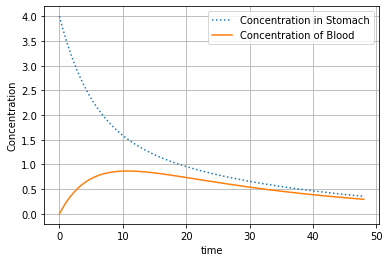

In [35]:
k10 = 1.4913/24
k21 = 2.5922/24
k12 = 1.4854/24
dose = 100 * 1000
t = 48
dt = 0.01
freq = 100
abs_factor = 0.12
vol = 3000
MEC = 10
MTC = 20

t_arr, x1_arr, x2_arr = two_compartment(k10, k21, k12, dose, t, dt, freq, abs_factor)
plt.figure()
plt.plot(t_arr, x1_arr/vol, linestyle=':',label="Concentration in Stomach")
plt.plot(t_arr, x2_arr/vol, linestyle='-',label="Concentration of Blood")
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q1_pro.png")

## Project Q1
### Multi dose with frequency 6 hours

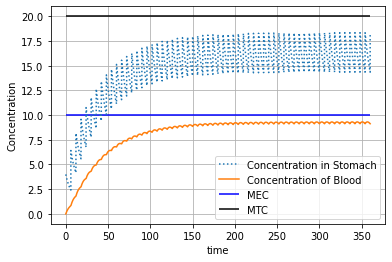

In [36]:
k10 = 0.9913/24
k21 = 2.5922/24
k12 = 1.4854/24
D1 = 100 * 1000
t = 24 * 15
dt = 0.01
freq = 6
abs_factor = 0.12
volume = 3000
MEC = 10
MTC = 20

T_arr, x1_arr, x2_arr = two_compartment(k10, k21, k12, D1, t, dt, freq, abs_factor)
plt.figure()
plt.plot(T_arr, x1_arr/volume, linestyle=':',label="Concentration in Stomach")
plt.plot(T_arr, x2_arr/volume, linestyle='-',label="Concentration of Blood")
plt.hlines(MEC, 0, t, 'b', label='MEC')
plt.hlines(MTC, 0, t, 'k', label='MTC')
plt.legend()
#plt.ylim(0, 40)
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q1_pro_multidose.png")

## Project Q2

In [37]:
def two_compartment2(k10, k21, k12, D1, t, dt, freq, abs_factor):
    
    T_arr = np.arange(0, t+dt, dt)
    x1 = 0.0
    x2 = 0.0
    dx1 = 0.0
    dx2 = 0.0
    x1_arr = 0 * T_arr
    x2_arr = 0 * T_arr
    freq_index = int(freq/dt)

    for i in range(len(T_arr)):

        dx1 = -(k10 + k12) * x1 + k21 * (x2)
        dx2 = k12 * x1 - k21 * x2
        x1 += dx1 * dt
        x2 += dx2 * dt
        if i == 0:
            #print(T_arr[i])
            x1 += abs_factor * D1 * 3
        if i == freq_index:
            x1 += abs_factor * D1 * 2
        x1_arr[i] = x1
        x2_arr[i] = x2

    return T_arr, x1_arr, x2_arr

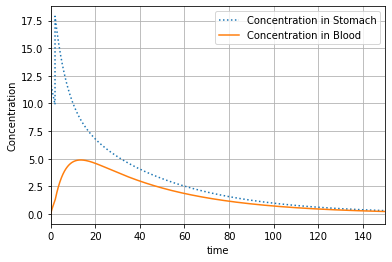

In [38]:
k10 = 0.9913/24
k21 = 2.5922/24
k12 = 1.4854/24
D1 = 100 * 1000
t = 24 * 15
dt = 0.01
freq = 2
abs_factor = 0.12
volume = 3000
MEC = 10
MTC = 20

T_arr, x1_arr, x2_arr = two_compartment2(k10, k21, k12, D1, t, dt, freq, abs_factor)
plt.figure()
plt.plot(T_arr, x1_arr/volume, linestyle=':',label="Concentration in Stomach")
plt.plot(T_arr, x2_arr/volume, linestyle='-',label="Concentration in Blood")
#plt.hlines(MEC, 0, t, 'b', label='MEC')
#plt.hlines(MTC, 0, t, 'k', label='MTC')
plt.legend()
plt.xlim(0, 150)
#plt.ylim(0, 40)
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("q2_pro.png")

## Project Q3

In [39]:
def dilantin_loading(k, t, dose, dt, freq, abs_factor, load_arr, freq_load):
    
    t_arr = np.arange(0, t+dt, dt)
    q = 0.0
    q_arr = 0 * t_arr
    dose_index = int(freq/dt)
    load_index = int(freq_load/dt)
    
    for i in range(len(t_arr)):
        q = q - q * k * dt
        if i%load_index == 0 and (i // load_index) < len(load_arr):
            q = q + abs_factor * load_arr[i // load_index]
        if (i - len(load_arr) * load_index) > 0 and (i - len(load_arr) * load_index) % dose_index == 0:
            q  = q + abs_factor * dose
            
        q_arr[i] = q
    return t_arr, q_arr

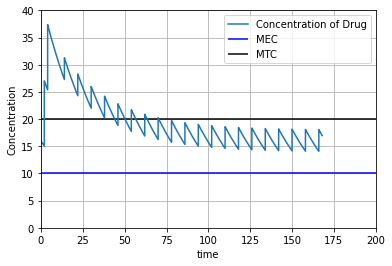

In [40]:
T_half = 22
freq = 8
t = 168
dose = 100 * 1000
vol = 3000
abs_factor = 0.12
MEC = 10
MTC = 20
freq_load = 2
load_arr = [400 * 1000, 300 * 1000, 300 * 1000]

dt = 0.001

k = math.log(2)/T_half

t_arr, q_arr = dilantin_loading(k, t, dose, dt, freq, abs_factor, load_arr, freq_load)
plt.figure()
plt.plot(t_arr, q_arr/vol, label="Concentration of Drug")
plt.hlines(MEC, 0, T, 'b', label='MEC')
plt.hlines(MTC, 0, T, 'k', label='MTC')
plt.legend()
plt.xlim(0, 200)
plt.ylim(0, 40)
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("single_loading.png")

In [41]:
def two_compartment_loading(k10, k21, k12, D1, t, dt, freq, abs_factor, freq_load, load_arr):
    
    cnt = 0
    T_arr = np.arange(0, t+dt, dt)
    x1 = 0.0
    x2 = 0.0
    dx1 = 0.0
    dx2 = 0.0
    x1_arr = 0 * T_arr
    x2_arr = 0 * T_arr
    freq_index = int(freq/dt)
    load_index = int(freq_load/dt)
    print(freq_index)
    print(load_index)
    for i in range(len(T_arr)):
        '''
        if i%load_index == 0 and i // load_index == 0:
            x1 += abs_factor * 4 * D1
        if i%load_index == 0 and i // load_index == 2:
            x1 += abs_factor * 3 * D1
        if i%load_index == 0 and i // load_index == 4:
            x1 += abs_factor * 3 * D1
        if i%freq_index == 0 and i > 400:
            x1 += abs_factor * D1
        '''
        if i == 0:
            x1 += abs_factor * 4 * D1
        if i == 200:
            x1 += abs_factor * 3 * D1
        if i == 400:
            x1 += abs_factor * 3 * D1
        elif i%freq_index == 0:
            x1 += abs_factor * D1
        
        dx1 = -(k10 + k12) * x1 + k21 * (x2)
        dx2 = k12 * x1 - k21 * x2
        x1 += dx1 * dt
        x2 += dx2 * dt
        x1_arr[i] = x1
        x2_arr[i] = x2

    return T_arr, x1_arr, x2_arr

800
200
19.987397323989818
0.0063013380050904125
24001
24001


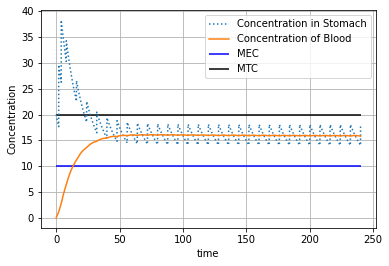

In [42]:
#k10 = 0.9913/24
#k21 = 2.5922/24
#k12 = 1.4854/24
D1 = 100 * 1000
t = 24 * 10
dt = 0.01
freq = 8
freq_loading = 2
D_arr = [400 * 1000, 300 * 1000, 300 * 1000]
abs_factor = 0.12
volume = 3000
MEC = 10
MTC = 20

k = math.log(2)/22

T_arr, x1_arr, x2_arr = two_compartment_loading(
    k, k, k, D1, t,
    dt, freq, abs_factor,
    freq_loading, D_arr
    )

print(x1_arr[0]/volume)
print(x2_arr[0]/volume)
print(len(x1_arr))
print(len(x2_arr))
plt.figure()
plt.plot(T_arr, x1_arr/volume, linestyle=':',label="Concentration in Stomach")
plt.plot(T_arr, x2_arr/volume, linestyle='-',label="Concentration of Blood")
plt.hlines(MEC, 0, t, 'b', label='MEC')
plt.hlines(MTC, 0, t, 'k', label='MTC')
plt.legend()
#plt.ylim(0, 40)
plt.grid()
plt.xlabel('time')
plt.ylabel('Concentration')
plt.savefig("two_loading.png")